# Ejercicio 4

Sea $(X,Y) \in \mathbb R^2$ un vector aleatorio tal que la distribución de $Y$ condicionada a $X$ es de Bernoulli de parámetro $(1 +e^{-\beta X})^{-1}$, donde $\beta \in \mathbb R$ y $P( Y = 0)  = P(Y = 1) = \frac{1}{2}$. Supongamos que queremos predecir $Y$ a partir de $X$. Responde a las siguientes preguntas, dejando el resultado en función del parámetro $\beta$.

1. Determina la regla de clasificación óptima en este modelo.
2. Si $X$ tiene distribución uniforme en $(0,1)$, calcula el error de la regla de clasificación del apartado anterior (error Bayes)
3. Si $X$ tiene distribución uniforme en $(0,1)$, calcula $\lim_{n\to \infty} EL_n$ donde $L_n$ es la probabilidad de error correspondiente al clasificador del vecino más próximo. Compara el resultado con el del apartado anterior.

**Solución.-**

Identificamos primero los elementos de nuestor problema. Nos dice el enunciado que la distribución $Y|X$ viene dada por:
$$
Y|X \sim Bern\left( \left(1+ e^{-\beta X}\right)^{-1}\right).
$$
Si nos fijamos en el parámetro de la distribución de Bernoulli, vemos que esto es la función logística aplicada al punto $x$, que sabemos que está fijo pues estamos dando la distribución condicionada $Y|X = x$. Por tanto, si llamamos $f$ a la función logística, y apli tenemos que 
$$
Y|X \sim Bern \left(f(x)\right).
$$
Dado que $x$ está fijo y sabiendo que función logística nos da la probabilidad de éxito, f(x) = $P(Y=1|X=x)$, podemos llamar $f(x) = p$, y tener así que
$$
Y|X \sim Bern(p)
$$

Además, sabemos que 
Recordamos que hemos definido $\eta(x) = P(Y=1|X = x)$. Con esta definición, se define la regla de Bayes como:
$$
g^*(x) = \begin{cases}1, & \eta(x) > 1/2 \\ 0, & \eta(x) \leq 1/2\end{cases},
$$

Y, aplicada a nuestro problema, sabiendo que $\eta(x) = f(x)$, tenemos que 
$$
g^*(x) = \begin{cases}1, & f(x) > 1/2 \\ 0, & f(x) \leq 1/2\end{cases}.
$$


## Apartado b

Ahora, sabemos que el error de $g^*(x)$ de Bayes es
$$
L^* = P(g^*(X) \neq Y )
$$
que, si lo expresamos en función de $\eta(x) = f(x)$, es
$$
L^* = \frac{1}{2} \left(1 - \mathbb E\left[ | 2 \eta(X) - 1| \right] \right) = \frac{1}{2} \left(1 - \mathbb E\left[ | 2 f(x) - 1| \right] \right). 
$$

Tenemos entonces que calcular
$$
E\left[ | 2 f(x) - 1| \right] = \int_\Omega |2f(x) - 1| f_X(x) dx \stackrel{(1)}{=} \int_0^1  |2f(x) - 1| dx, 
$$
donde en $(1)$ hemos usado que $f_X(x)$ es la función de densidad de una $U(0,1)$. Tenemos entonces que distinguir dos casos para eliminar ese valor absoluto. Veamos cómo se distinguen, usando que $f(x)$ es la función logística:

$$
2f(x) - 1 > 0 \Leftrightarrow f(x) > \frac{1}{2} \Leftrightarrow 1 + e^{-\beta x} < 2 \Leftrightarrow -\beta x < 0 \stackrel{(2)} \Leftrightarrow \beta > 0
$$
donde en $(2)$ hemos usado que, como $x \sim U(0,1)$, se tiene que $x > 0$. Es por esto que tenemos que
$$
E\left[ | 2 f(x) - 1| \right] =
\begin{cases}
\int_0^1 (2f(x) - 1) dx & \text{ si } \beta > 0 \\
\int_0^1  (-2f(x) + 1) dx & \text{ si } \beta < 0\end{cases}
$$
El único término que debemos integrar en ambos casos de forma no inmediata es $f(x)$. Vamos a calcular pues su integral entre $0$ y $1$.

$$
\int_0^1 f(x) = \int_0^1 \frac{1}{1 + e^{-\beta x}} dx = \int_0^1 \frac{-\beta e^{-\beta x}}{-\beta e^{-\beta x}} \frac{1}{1 + e^{-\beta x}}dx = \frac{1}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right)
$$
Por lo que, sustituyendo esta integral en el cálculo de la esperanza, tenemos:

$$
E\left[ | 2 f(x) - 1| \right] = 
\begin{cases}
\frac{2}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right) - 1 & \text{ si } \beta > 0 \\
\frac{-2}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right) + 1  & \text{ si } \beta < 0
\end{cases}
$$

Por lo que, nuestro error Bayes final es

$$
L^* = 
 \begin{cases}
 \frac{1}{2} \left(1 - \left(\frac{2}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right) - 1\right) \right) & \text{ si } \beta > 0 \\
\frac{1}{2} \left( 1 - \left( \frac{-2}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right) + 1 \right) \right)  & \text{ si } \beta < 0
\end{cases}
= 
\begin{cases}
 - \frac{1}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right) + 1 & \text{ si } \beta > 0 \\
\frac{1}{\beta} \log\left( \frac{1 + e^{-\beta}}{2} \right)  & \text{ si } \beta < 0
\end{cases}
$$

## Apartado c

Se nos pide para final calcular
$$
\lim_{n\to \infty} EL_n,
$$
siendo $L_n$ la probabilidad de error correspondiente al clasificador del vecino más cercano. Para ello, sabemos que se puede demostrar formalmente que 
$$
\lim_{n\to \infty} EL_n = L_{\text{1NN}} = 2 \mathbb E[\eta(x)(1-\eta(x))].
$$
Sabiendo esto, lo que debemos hacer es calcular la integral del argumento de la esperanza para terminar con el ejercicio. Podemos razonar igual que en el caso anterior, usando también que $f_X(x) = 1$ en $[0,1]$ para cambiar los límites de la integral y obtener el resultado de forma sencilla:
\begin{align*}
\mathbb E[\eta(x)(1-\eta(x))] & = \int_\Omega \left(\eta(x)(1-\eta(x)\right) f_X(x) dx \\
& = \int_0^1 f(x)(1-f(x)) dx\\
& = \int_0^1 \frac{1}{1 + e^{-\beta x}} \left( 1- \frac{1}{1 + e^{-\beta x}} \right) dx \\
& = \int_0^1 \frac{e^{-\beta x}}{\left( 1 + e^{-\beta x}\right)^2}dx\\
& = \frac{1}{-\beta}\int_0^1 -\beta e^{-\beta x}\left( 1 + e^{-\beta x}\right)^{-2} dx\\
& = \frac{-1}{\beta} \left[\left(1 + e^{-\beta x} \right)^{-1} \right]_0^1 \\
& = \frac{-1}{\beta e^{-\beta x}} 
\end{align*}

# Ejercicio 6

En un experimento descrito en Prentice (1976) se expuso una muestra de escarabajos a cierto pesticida. Tras cinco horas de exposición a distintos niveles de concentración del pesticida algunos de los escarabajos murieron y otros sobrevivieron. Los resultados para cada dosis aparecen en la tabla siguiente:

| Dosis  | N. insectos | N. muertos |
|--------|-------------|------------|
| 1.6907 | 59          | 6          |
| 1.7242 | 60          | 13         |
| 1.7552 | 62          | 18         |
| 1.7842 | 56          | 28         |
| 1.8113 | 63          | 52         |
| 1.8369 | 59          | 53         |
| 1.8610 | 62          | 61         |
| 1.8839 | 60          | 60         |

Formula un modelo de regresión logística para analizar estos datos y estima la probabilidad de que muera un escarabajo expuesto durante cinco horas a una dosis de concentración 1.8

**Solución .-**

En nuestro problema, queremos ajustar un modelo de regresión logística usando los datos que tenemos en la tabla. Lo primero que nos interesa saber es, usando esos datos, cuál es la probabilidad de morir que tiene un escarabajo según la cantidad de Dosis que ha recibido. Para esto, basta con hacer el cociente $N.muertos/N.insectos$. Obtenemos una nueva tabla:

In [1]:
dose <- c(1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.8610, 1.8839 )
n_insects <- c(59, 60, 62, 56, 63, 59, 62, 60)
n_deaths <- c( 6, 13, 18, 28, 52, 53, 61, 60)

probability <- n_deaths/n_insects

df <- data.frame ( "dose" =  dose, "probability" = probability)
df

dose,probability
<dbl>,<dbl>
1.6907,0.1016949
1.7242,0.2166667
1.7552,0.2903226
1.7842,0.5000000
1.8113,0.8253968
1.8369,0.8983051
1.8610,0.9838710
1.8839,1.0000000


Una vez obtenida esta tabla, presentamos los elementos de nuestro problema de regresión logística. Tenemos

- $n=1$ variables regresoras, en este caso `dose`.
- $n=1$ variables de salida, $Y$, que será la probabilidad que tiene un escarabajo de morir. 
- Por tanto, nuesta probabilidad de éxito puede medirse usando la función logística del siguiente modo:
$$
\eta(x) = f(\beta_0 + \beta_1 x_1) = \frac{1}{1+ e^{-\beta_0 - \beta_1 x_1}}
$$

Visualizamos nuestro conjunto de datos primero

Loading required package: ggplot2

Loading required package: reshape2



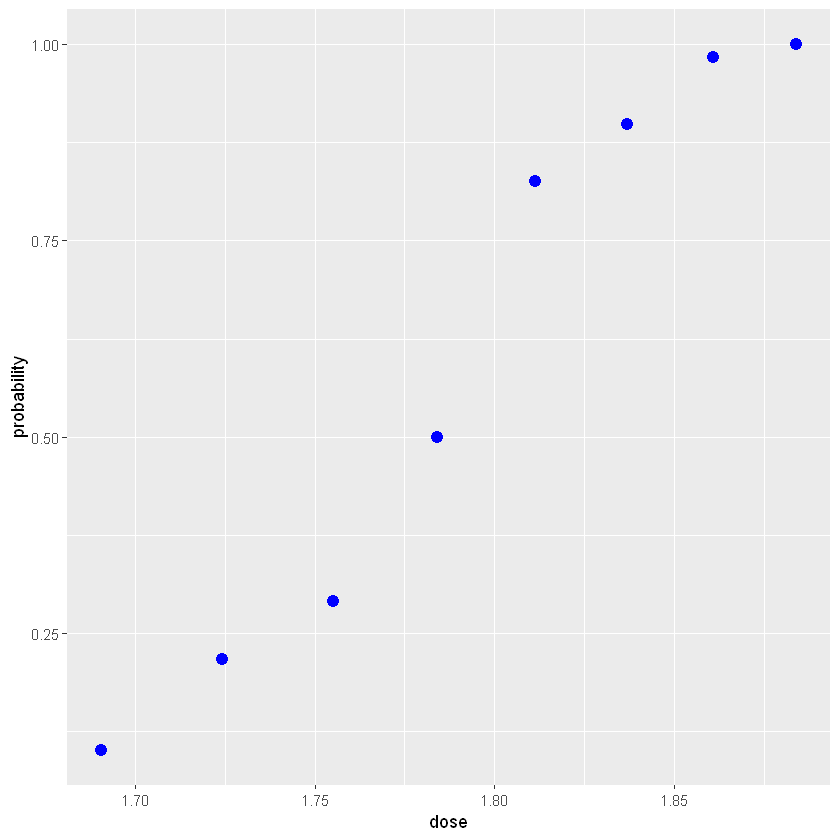

In [2]:
require(ggplot2)
require(reshape2)
ggplot(df, aes(dose,probability))+
    geom_point(color = "blue", size=3)

Procedemos entonces a ajustar el modelo de regresión logística a estos datos. El modelo de regresión que ajustaremos será un modelo lineal generalizado. 

Como comentario, utilizamos como familia la `quasibinomial`. El resultado que se obtiene para la predicción del punto es el mismo, pero evitamos un *Warning* de `R` informándonos de que estamos usando números no enteros para el número de `#sucesses` en una regresión logística con familia binomial.

In [82]:
reg <- glm(probability ~ dose, family = quasibinomial, data = df)

In [83]:
summary(reg)


Call:
glm(formula = probability ~ dose, family = quasibinomial, data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.20933  -0.04659   0.10858   0.16310   0.20807  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -60.459      6.701  -9.023 0.000104 ***
dose          34.121      3.766   9.059 0.000101 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for quasibinomial family taken to be 0.02798728)

    Null deviance: 4.71186  on 7  degrees of freedom
Residual deviance: 0.18871  on 6  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 5


Como podemos comprobar, se estima que los parámetros son $\beta_ 0  = -60.459$ y $\beta_1 = 34.121$, por lo que nuestro modelo de regresión logística es

$$
\eta(x) = f(-60.459+ 34.121 x) = \frac{1}{1+ e^{60.459 - 34.121 x}}
$$

In [84]:
new_data <- data.frame(dose = c( 1.8 ))
prob <- predict(reg, newdata = new_data, type = "response")

cat("The probability of dying of an individual when the dose is 1.8 is", prob)

The probability of dying of an individual when the dose is 1.8 is 0.7229837

Podemos hacer un gráfico de nuestro modelo (en negro), junto con los puntos iniciales (en azul), además de la predicción para el punto que se nos pedía (en rojo):

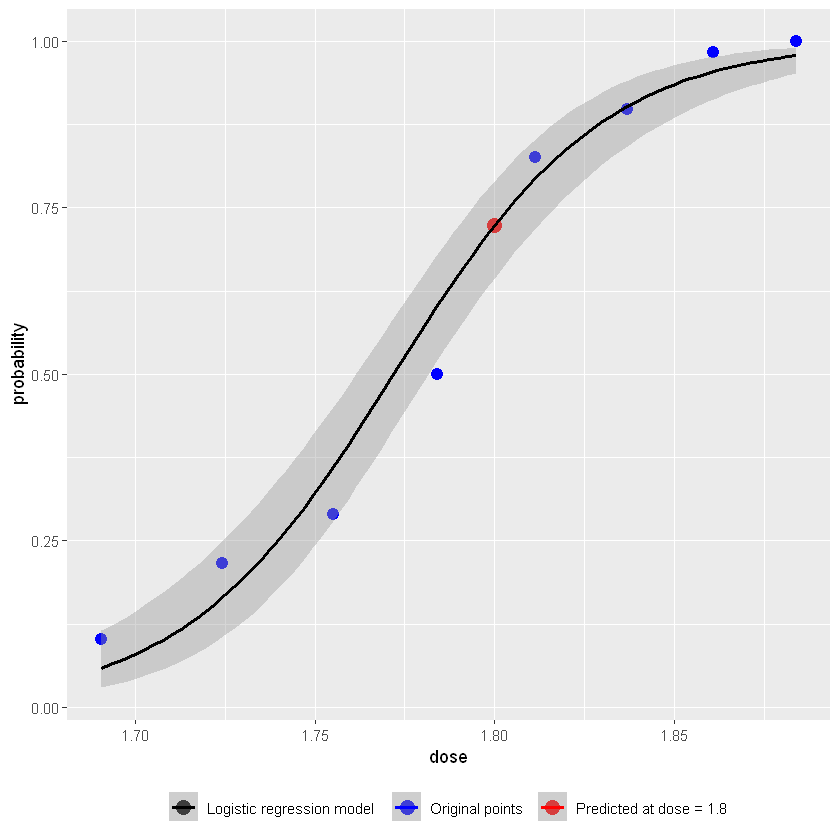

In [81]:

ggplot(df, aes(x = dose, y = probability)) +
    geom_point(aes(colour = "Original points"), size = 3)+
    geom_point(aes(x = 1.8, y = prob, colour = "Predicted at dose = 1.8"), size = 4 ) + 
    geom_smooth(formula = y ~ x, method = glm, method.args = list(family = quasibinomial), aes(colour ="Logistic regression model"))+
    scale_colour_manual(name="", values=c("black", "blue", "red")) + 
    theme(legend.position='bottom')